### Import Libraries

In [13]:
import numpy as np # Numpy Library.
import matplotlib.pyplot as plt # Plotting Library.
from IPython.display import display, clear_output # Display Library.
import time # Time Library.
from celluloid import Camera # To create GIF.
from IPython.display import HTML
%matplotlib inline
%matplotlib notebook

In [14]:
def gridlines():
    '''Function to Plot Grids.
       Parameters: 
       ===========
                  None.
       Return:
       =======
                  ax: axes object (object);'''
    ax = plt.gca()  # Get Current axes.
    ax.set_xticks(np.arange(0, 10, 1)) # X-Ticks.
    ax.set_yticks(np.arange(0, 10, 1)) # Y-Ticks.
    ax.set_xticklabels(np.arange(0, 10, 1)) # Labels for X-Ticks.
    ax.set_yticklabels(np.arange(0, 10, 1)) # Labels for Y-Ticks.
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True) # Minor X-Ticks.
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True) # Minor Y-Ticks.
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2) # Plot grids.
            
    return ax # Return ax object.

### Dijkstra Class

In [21]:
class Dijkstra():
    def __init__(self, mmap, start, dest, draw=True):
        '''Sets the Dijkstra Object.
           Parameters:
           ===========
                      mmap: input map (vector) ===> Shape:(NxM); Type:Numpy;
                      start: starting point (tuple);
                      dest: destination point (tuple);
                      draw: to draw or not (boolean);'''
        self.map = mmap # Input Map.
        self.start = start # Start.
        self.dest = dest # Destination.
        self.draw = draw # To Draw/Not.
        
    def DijkstraGrid(self):
        '''Implements Dijkstas Shortest Path Algorithm.
           Parameters:
           ===========
                      None
           Return:
           =======
                      statemap:
                      route:
                      parentArray:
                      distanceArray:'''
        nrows, ncols = self.map.shape # Get Rows and Columns from Shape.
        statemap = np.zeros((nrows, ncols)) # State Map of zeros.
        statemap[self.map==0] = 1 # Where no obstacles put 1.
        statemap[self.map==1] = 2 # Where obstacles put 2.
        statemap[self.start] = 5 # Where Starting Point put 5.
        statemap[self.dest] = 6 # Where Destination Point put 6.
        distanceArray = np.ones((nrows, ncols))*np.inf # Distance Array with Infinite Values.
        distanceArray[self.start[0], self.start[1]] = 0 # Initialise starting point as 0 in distance array.
        parentArray = np.zeros((nrows, ncols)) # Parent Array with zeros.
        numExpanded = 0 
        
        loc = np.array([[self.start[0], self.dest[0]], [self.start[1], self.dest[1]]]) # Location Array.
        st_node = np.ravel_multi_index(loc, (nrows, ncols)) # 
        print(st_node)
        
        fig = plt.figure() # Figure.
        camera = Camera(fig)
        ax = plt.gca() # get Current Axes.
        plt.ion() # Interactive Mode.
        ax.imshow(statemap)
        camera.snap()
        gridlines()
        fig.show() # Show Figure.
        fig.canvas.draw() # Draw Canvas.
        
        
        
        while True:
        
            statemap[self.start] = 5 
            statemap[self.dest] = 6
            
            if self.draw:
                ax.clear()
                ax.imshow(statemap)
                camera.snap()
                gridlines()
                fig.canvas.draw()
                
                
            
            min_dist = np.amin(distanceArray.flatten())
            current = np.argmin(distanceArray.flatten())

            
            if (current == st_node[-1]) or np.isinf(min_dist):
                break
            
            current_ind = np.unravel_index(current, (10,10))

            statemap[current_ind] = 3
            distanceArray[current_ind] = np.inf
            numExpanded += 1 
            
            i = current_ind[0]
            j = current_ind[1]
            
            for jw in range(j-1, j+2, 2):
                if i>=0 and i<=nrows-1 and jw>=0 and jw<=ncols-1:
                    if (statemap[i, jw]==1) or (statemap[i, jw]==6):
                        statemap[i, jw] = 4
                        distanceArray[i, jw] = min_dist+1
                        parentArray[i, jw] = current
                        ax.imshow(statemap)
                        camera.snap()
                        gridlines()
                        
                        
            for iw in range(i-1, i+2, 2):
                if iw>=0 and iw<=nrows-1 and j>=0 and j<=ncols-1:
                    if (statemap[iw, j]==1) or (statemap[iw, j]==6):
                        statemap[iw, j] = 4
                        distanceArray[iw, j] = min_dist+1
                        parentArray[iw, j] = current 
                        ax.imshow(statemap)
                        camera.snap()
                        gridlines()
                                               
        print(parentArray) 
        print(i)
        route = []
        route.append(self.dest)
        while parentArray[route[-1]] != 0:
            traceIdx = np.unravel_index(int(parentArray[route[-1]]), (nrows, ncols))
            route.append(traceIdx)
        print(len(route))
                
        for i in range(len(route)-2, 0 , -1):
            statemap[route[i]] =7
                
            if self.draw:
                ax.clear()
                ax.imshow(statemap)
                camera.snap()
                gridlines()
                fig.canvas.draw()
                
                
        animation = camera.animate(blit=False, interval=10)
        animation.save('animation.gif')
        
        return statemap, route, parentArray, distanceArray

### Call Dijkstra

[51 78]


<IPython.core.display.Javascript object>


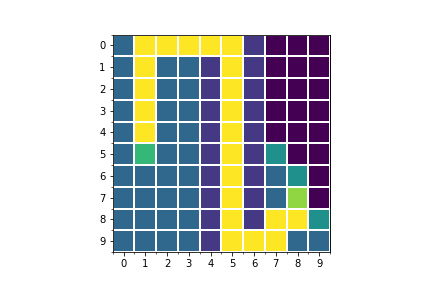

[[ 1. 11.  1.  2.  3.  4.  0.  0.  0.  0.]
 [11. 21. 11. 12.  0.  5.  0.  0.  0.  0.]
 [21. 31. 21. 22.  0. 15.  0.  0.  0.  0.]
 [31. 41. 31. 32.  0. 25.  0.  0.  0.  0.]
 [41. 51. 41. 42.  0. 35.  0.  0.  0.  0.]
 [51.  0. 51. 52.  0. 45.  0. 67.  0.  0.]
 [50. 51. 52. 53.  0. 55.  0. 77. 67.  0.]
 [60. 61. 62. 63.  0. 65.  0. 87. 88.  0.]
 [70. 71. 72. 73.  0. 75.  0. 97. 87. 88.]
 [80. 81. 82. 83.  0. 85. 95. 96. 97. 98.]]
6
24


/tmp/ipykernel_5065/2347777543.py:126: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  animation.save('animation_sin.mp4',


In [22]:
map_ = np.ones((10, 10))*False
map_[:9, 6] =True
map_[1:10, 4] = True
dij = Dijkstra(map_, (5,1), (7,8))
statemap,route,parentArray,distanceArray = dij.DijkstraGrid()